### Obtain tickers composing one index
Each index is composed of several tickers. We might need to pull the components and then statistics for each of them in order to obtain all data of one particular economy. 
The following function scrapes Yahoo Finance to get a list of tickers, which we will later use within the yfinance library. 
Luckily, the url and webpage structure is analogous for each index, so all we need to do is pass the correct symbol.
At the current state, however, it only fetches the top 30 components, so we suggest to use this function only to work on "demo" data.

In [2]:
import requests
import pandas as pd

#def get_components(index):
#    url = f"https://finance.yahoo.com/quote/{index}/components"
#    headers = {
#      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; rv:91.0) Gecko/20100101 Firefox/91.0'
#    }
#    response = requests.get(url, headers=headers)
#    return pd.read_html(response.text)[0]

###Commenting this function out because it doesnt get full list of components


The following block gets components data from Wikipedia. The issue is that each webpage is slightly different, so generalising the function it's not as easy as before. Moreover, the symbols we see on Wikipedia might not necessarily be matching with those that Yahoo Finance uses.
The example for the FTSE MIB and for the Dow Jones Industrial Average components is provided below.

In [44]:
import requests
import pandas as pd

ftsemibcomponents = pd.read_html('https://en.wikipedia.org/wiki/FTSE_MIB')[1]
ftsemibcomponents.rename(columns={'Ticker':'Symbol'}, inplace=True)
symbols = ftsemibcomponents['Symbol']

djiacomponents = pd.read_html('https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average')[1]


### YFinance library and index data
We rely onto the YFinance library to get the financial data for its simplicity of use and because it does not need any API keys. The drawbacks are the occasional broken function or lack of some specific data. As far as financials and historical data goes, however, we are satisfied with the granularity and availability. 

To deal with the entire index, we initialize the "Tickers" object, which can deal with multiple symbols at the same time by being a collection of individual "Ticker" objects. 

In [46]:
import yfinance as yf
tickers = yf.Tickers(list(symbols)) #Initialize tickers object


### Qualitative information on index components
Given the list of index components, we might be interested in looking at some of their main features, such as the industry, size or some key financial multipliers. The following function does exactly that, taking "infoneeded" as a list of parameters we want to look at. The company name is provided by default.

Next we get historical close prices. The output format comes handy when using the data in portfolio optimization, especially if using the PyPortfolioOpt library.

In [56]:
infoneeded = ['industry', 'marketCap', 'trailingPE','priceToBook']
def index_info_table(components, infoneeded):
    infocomponents = components[['Symbol', 'Company']]
    infocomponents.set_index('Symbol', inplace=True)  
    
    def fetch_info(ticker):
        ticker_info = tickers.tickers[ticker].info
        supportlist = []
        for i in infoneeded:
            supportlist.append(ticker_info.get(i, None))
        return pd.Series(supportlist)

    infocomponents[infoneeded] = infocomponents.index.to_series().apply(fetch_info)
    return infocomponents


In [57]:
infocompo = index_info_table(ftsemibcomponents, infoneeded)

C:\Users\Ken\AppData\Local\Temp\ipykernel_14484\2975446117.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infocomponents[infoneeded] = infocomponents.index.to_series().apply(fetch_info)
C:\Users\Ken\AppData\Local\Temp\ipykernel_14484\2975446117.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infocomponents[infoneeded] = infocomponents.index.to_series().apply(fetch_info)


In [58]:
infocompo

,Company,industry,marketCap,trailingPE,priceToBook
Symbol,,,,,
A2A.MI,A2A,Utilities—Diversified,5474760192,15.886363,1.410412
AMP.MI,Amplifon,Medical Distribution,6789597696,39.306667,6.361675
AZM.MI,Azimut,Asset Management,2958692608,6.986928,1.966158
BGN.MI,Banca Generali,Banks—Regional,3837791232,14.991073,3.791352
BMED.MI,Banca Mediolanum,Banks—Regional,6218004480,9.671264,1.957199
BAMI.MI,Banco BPM,Banks—Regional,6608939008,6.834375,0.384122
BPE.MI,BPER Banca,Banks—Regional,3922490880,5.330769,0.462000
BZU.MI,Buzzi Unicem,Building Materials,5157763584,6.384259,0.988141
CPR.MI,Campari,Beverages—Wineries & Distilleries,13559267328,38.693546,4.769383


In [49]:
period='1y' #Either pass period or start/end
interval='1d'
closeprices = tickers.history(period=period, interval=interval)['Close']

[*********************100%%**********************]  40 of 40 completed


In [50]:
closeprices

,A2A.MI,AMP.MI,AZM.MI,BAMI.MI,BGN.MI,BMED.MI,BPE.MI,BZU.MI,CNHI.MI,CPR.MI,...,REC.MI,SPM.MI,SRG.MI,STLAM.MI,STMMI.MI,TEN.MI,TIT.MI,TRN.MI,UCG.MI,UNI.MI
Date,,,,,,,,,,,,,,,,,,,,,
2022-09-01,1.039310,25.264067,14.599433,2.310323,24.460550,5.860874,1.351050,16.276623,11.631454,9.624830,...,39.588306,0.6834,4.436306,12.026501,34.068005,13.174779,0.2072,6.775748,9.201090,3.890482
2022-09-02,1.062931,26.136610,15.137899,2.430425,25.452578,6.139425,1.383825,16.619806,12.171208,9.803916,...,40.269360,0.6872,4.568676,12.341589,35.375061,13.622280,0.2092,6.913990,9.490672,3.969388
2022-09-05,1.037893,25.680508,14.913148,2.346259,24.810123,5.945568,1.342401,15.884417,11.840548,9.380081,...,39.131035,0.6720,4.484527,11.749882,34.485470,13.747387,0.2022,6.846789,9.231472,3.848709
2022-09-06,1.023721,25.640848,14.988064,2.353824,24.904602,5.986974,1.345133,15.884417,11.869723,9.503451,...,39.782894,0.6842,4.456162,11.907426,34.714081,13.275828,0.2030,6.829509,9.276096,3.853351
2022-09-07,1.030807,25.095509,15.016158,2.344367,24.904602,6.064140,1.326014,15.884417,11.728707,9.300488,...,39.393726,0.6714,4.483582,12.033828,35.444641,12.857199,0.2020,6.852549,9.127033,3.837569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-28,1.741000,30.209999,20.980000,4.403000,33.259998,8.320000,2.778000,28.080000,12.290000,11.960000,...,46.189999,1.5175,4.684000,16.931999,43.180000,15.155000,0.2837,7.500000,22.170000,5.032000
2023-08-29,1.762500,30.459999,21.150000,4.415000,33.650002,8.370000,2.801000,27.980000,12.375000,12.130000,...,46.889999,1.5435,4.729000,17.219999,44.105000,15.290000,0.2840,7.586000,22.600000,5.106000
2023-08-30,1.750500,30.270000,21.250000,4.451000,33.439999,8.390000,2.828000,27.520000,12.505000,12.225000,...,46.470001,1.5740,4.739000,17.166000,43.654999,15.255000,0.2859,7.592000,22.700001,5.118000


### Individual analysis
We then take under analysis one individual ticker. YFinance provides us with a vast choice of financial insights and historical data. In the notebook we provide examples on Intesa San Paolo. First we load the ticker and its historical prices to show a candlestick plot. Then we proceed to construct a table that summarises some key figures for a single ticker and an easy comparison.

In [2]:
import pandas as pd
import yfinance as yf

In [7]:
isp = yf.Ticker('ISP.MI') #Initialize ticker object, we take as example "Intesa San Paolo"


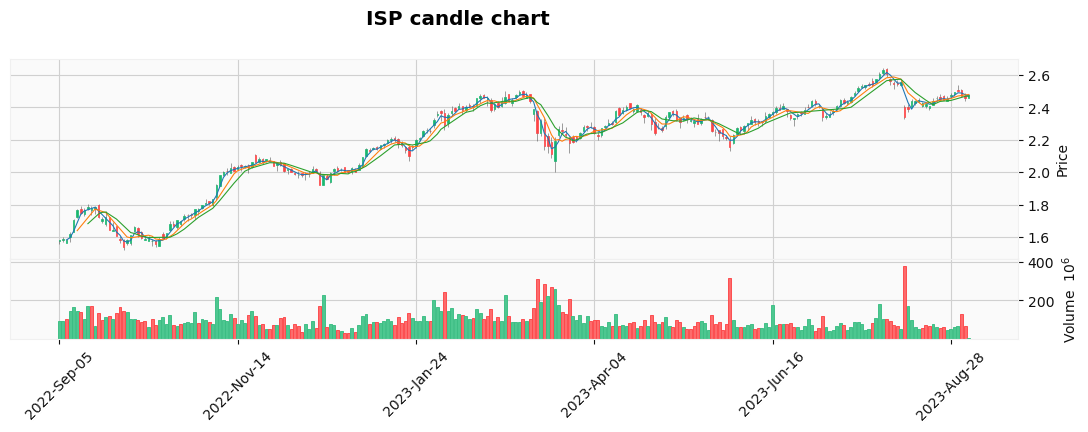

In [8]:
import matplotlib.pyplot as plt
import mplfinance as mpl

isphist = isp.history(period='1y', interval='1d', actions=True)
mpl.plot(isphist.drop(['Dividends','Stock Splits'],axis='columns'), type='candle', style='yahoo', mav=(3,6,9), volume=True, figsize=(14,4), title='ISP candle chart')

In [65]:
isp.info #Dictionary with extensive information about the ticker

{'address1': 'Piazza San Carlo, 156',
 'city': 'Turin',
 'state': 'TO',
 'zip': '10121',
 'country': 'Italy',
 'phone': '39 011 5551',
 'website': 'https://www.intesasanpaolo.com',
 'industry': 'Banks—Regional',
 'industryDisp': 'Banks—Regional',
 'sector': 'Financial Services',
 'sectorDisp': 'Financial Services',
 'longBusinessSummary': 'Intesa Sanpaolo S.p.A. provides various financial products and services primarily in Italy. It operates through six segments Banca dei Territori, IMI Corporate & Investment Banking, International Subsidiary Banks, Asset Management, Private Banking, and Insurance. The company offers lending and deposit products; corporate, investment banking, and public finance services; industrial credit, factoring, and leasing services; asset management solutions; life and non-life insurance products; and bancassurance and pension fund, and fiduciary services. It also provides consumer credit and E-money; wealth management and private banking services. The company s

In [67]:
pd.DataFrame(isp.dividends)

,Dividends
Date,
2022-11-21 00:00:00+01:00,0.0738
2023-05-22 00:00:00+02:00,0.0901


In [60]:
isp.earnings_dates

,EPS Estimate,Reported EPS,Surprise(%)
Earnings Date,,,
2023-11-03 11:00:00+01:00,0.10,NaN,NaN
2023-07-28 08:00:00+02:00,0.10,0.11,0.0680
2023-05-05 08:00:00+02:00,0.09,0.10,0.0753
2023-02-03 07:00:00+01:00,0.04,0.05,0.3158
2022-11-04 10:00:00+01:00,0.04,0.05,0.2500
2022-07-29 09:00:00+02:00,0.05,0.07,0.4894
2022-05-06 08:00:00+02:00,0.04,0.05,0.2500
2022-02-04 02:00:00+01:00,NaN,0.01,2.3333
2021-11-03 09:00:00+01:00,0.05,0.05,0.1111


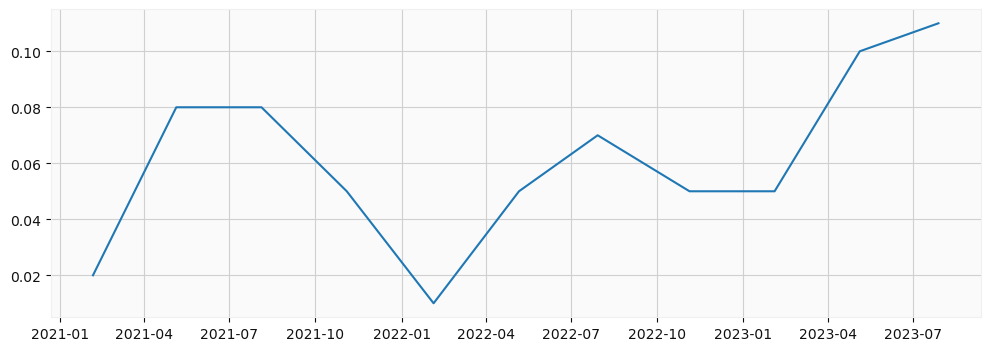

In [75]:
plt.figure(figsize=(12,4))
plt.plot(isp.earnings_dates.index, isp.earnings_dates['Reported EPS'])

In [76]:
isp.balance_sheet.head()

,2022-12-31,2021-12-31,2020-12-31,2019-12-31
Treasury Shares Number,23892236.0,30629777.0,42128001.0,26380005.0
Ordinary Shares Number,18964910924.0,19399833528.0,19388335304.0,17483348420.0
Share Issued,18988803160.0,19430463305.0,19430463305.0,17509728425.0
Net Debt,NaN,NaN,18646000000.0,66072000000.0
Total Debt,96139000000.0,101214000000.0,107154000000.0,95351000000.0


In [77]:
isp.income_stmt.head()

,2022-12-31,2021-12-31,2020-12-31,2019-12-31
Tax Effect Of Unusual Items,-37989012.818379,-25698899.826288,26213315.217391,-28179000.0
Tax Rate For Calcs,0.27135,0.219649,0.026721,0.279
Total Unusual Items,-140000000.0,-117000000.0,981000000.0,-101000000.0
Total Unusual Items Excluding Goodwill,-140000000.0,-117000000.0,981000000.0,-101000000.0
Net Income From Continuing Operation Net Minority Interest,4354000000.0,4185000000.0,2141000000.0,4118000000.0


In [39]:
#Joining together balance sheet and income statement, constructs a table of multipliers using the provided columns
#Different balance sheet styles might affect the end result

def corporate_synthetic(ticker):
    fullstate = ticker.balance_sheet.T.join(ticker.income_stmt.T)
    fullstate['Debt-Equity Ratio'] = fullstate['Total Debt']/fullstate['Total Equity Gross Minority Interest']
    fullstate['Cash Ratio'] = fullstate['Cash And Cash Equivalents']/fullstate['Payables']
    fullstate['Net Profit Margin'] = fullstate['Net Income']/fullstate['Total Revenue']
    fullstate['ROE'] = fullstate['Net Income']/fullstate['Stockholders Equity']
    fullstate['ROA'] = fullstate['Net Income']/fullstate['Total Assets']
    fullstate['NOPAT'] = (1-fullstate['Tax Rate For Calcs'])*fullstate['Interest Expense']+fullstate['Net Income']
    return fullstate[['Debt-Equity Ratio', 'Cash Ratio', 'Net Profit Margin', 'ROE', 'ROA', 'NOPAT']]

In [78]:
corporatevalues = corporate_synthetic(isp)

In [82]:
ucg = yf.Ticker('UCG.MI') #Initialize Unicredit ticker to conduct comparisons

In [83]:
corporate_synthetic(ucg)

,Debt-Equity Ratio,Cash Ratio,Net Profit Margin,ROE,ROA,NOPAT
2022-12-31,1.818385,34.943647,0.306983,0.101959,0.007529,11530856885.0
2021-12-31,2.027813,43.620161,0.082814,0.024989,0.00168,4285120000.0
2020-12-31,2.236896,52.081132,-0.151129,-0.046801,-0.00299,15600000.0
2019-12-31,2.041758,16.026175,0.168146,0.054921,0.003942,6603995944.0


In [84]:
corporate_synthetic(isp)

,Debt-Equity Ratio,Cash Ratio,Net Profit Margin,ROE,ROA,NOPAT
2022-12-31,1.555119,3.813314,0.193795,0.070619,0.004463,6938521550.0
2021-12-31,1.57984,7.917645,0.186822,0.065621,0.003915,6120270480.0
2020-12-31,1.615687,4.717703,0.165105,0.049749,0.003268,5662506829.0
2019-12-31,1.696184,1.834753,0.220919,0.074721,0.005124,6538949000.0


In [86]:
compare = pd.concat([corporate_synthetic(ucg),corporate_synthetic(isp)], keys = ['Unicredit', 'Intesa'],axis='columns')

In [88]:
compare.T

2022-12-31    2021-12-31    2020-12-31  \
Unicredit Debt-Equity Ratio       1.818385      2.027813      2.236896   
          Cash Ratio             34.943647     43.620161     52.081132   
          Net Profit Margin       0.306983      0.082814     -0.151129   
          ROE                     0.101959      0.024989     -0.046801   
          ROA                     0.007529       0.00168      -0.00299   
          NOPAT              11530856885.0  4285120000.0    15600000.0   
Intesa    Debt-Equity Ratio       1.555119       1.57984      1.615687   
          Cash Ratio              3.813314      7.917645      4.717703   
          Net Profit Margin       0.193795      0.186822      0.165105   
          ROE                     0.070619      0.065621      0.049749   
          ROA                     0.004463      0.003915      0.003268   
          NOPAT               6938521550.0  6120270480.0  5662506829.0   

                               2019-12-31  
Unicredit Debt-Equity Ratio      2.041758  
          Cash Ratio            16.026175  
          Net Profit Margin      0.168146  
          ROE                    0.054921  
          ROA                    0.003942  
          NOPAT              6603995944.0  
Intesa    Debt-Equity Ratio      1.696184  
          Cash Ratio             1.834753  
          Net Profit Margin      0.220919  
          ROE                    0.074721  
          ROA                    0.005124  
          NOPAT              6538949000.0